## Observations and Insights 

1. For the linear plot of "Tumor Volume versus Timepoint for Mouse s185 Treated with Capomulin", it can be deduced that the drug was successful in shrinking the tumor from 0 to approximately 45 day timepoint. However, this was only the case Mouse ID s185 which means that other mice would also need to be plotted to see if the drug regimen affects other mouse IDs in a similar fashion to deem successful overall!

2. If mice were to be treated with Capomulin and Ramicane, they both required greater than 200 timepoints. This means that perhaps the drug regimens take longer to take effect.

3. For the "Final Tumor Volume of Each Mouse Across Four Drug Regimens" boxplot, Infubinol seemed to have an outlier in that its final tumor volume was approximately 36 mm3 compared to the average final tumor volume of Infubinol which was around 60 mm3.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedDF = pd.merge(mouse_metadata, study_results, how = "outer")

# Display the data table for preview
combinedDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# to get how many unique mouse IDs there are 
len(combinedDF["Mouse ID"].unique())

249

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combinedDF.duplicated(subset = ['Mouse ID', 'Timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# the duplicated().sum() means that there are five duplicate data
combinedDF.duplicated(subset = ['Mouse ID', 'Timepoint']).sum()

5

In [6]:
# We can use Pandas loc data selector to extract those duplicate rows
# the keep = 'first' inside duplicated() means it will keep firt occurence and then consider the rest as duplicates
combinedDF.loc[combinedDF.duplicated(['Mouse ID','Timepoint']),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# alternative way to drop by index
# filter = combinedDF["Mouse ID"] == 'g989'
# combinedDF = combinedDF.drop(index = combinedDF[combinedDF["Mouse ID"] == 'g989'].index)

combinedDF = combinedDF.drop(combinedDF.index[combinedDF["Mouse ID"] == "g989"])
combinedDF["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

In [8]:
# alternative way to drop g989
# combinedDF = combinedDF[combinedDF["Mouse ID"] != "g989"]

In [9]:
# check to see if you dropped "g989" by taking len of the unique "Mouse ID" column data
len(combinedDF["Mouse ID"].unique())

248

In [10]:
# check to see if "g989" duplicates were dropped
combinedDF.loc[combinedDF.duplicated(['Mouse ID','Timepoint']),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [11]:
# Checking the number of mice in the clean DataFrame
combinedDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [12]:
combinedDF["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

groupbyMean = combinedDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
groupbyMean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [14]:
groupbyMedian = combinedDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
groupbyMedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [15]:
groupbyVariance = combinedDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
groupbyVariance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [16]:
groupbySTDEV = combinedDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
groupbySTDEV

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [17]:
groupbySEM = combinedDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
groupbySEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# combine summary statistics into a single dataframe

summaryStatistics = {"Mean": groupbyMean, "Median": groupbyMedian, "Variance": groupbyVariance, "Standard Deviation": groupbySTDEV, "SEM": groupbySEM}
summaryStatisticsDF = pd.DataFrame(summaryStatistics)
summaryStatisticsDF.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summaryStatisticsAltDF = combinedDF.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":[np.mean, np.median, np.var, np.std, st.sem]})
summaryStatisticsAltDF.head()


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

In [20]:
combinedDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
#timepoints = combinedDF[["Drug Regimen","Timepoint"]]

# Set the index to be "Drug Regimen" so they will be used as labels
#timepoints = timepoints.set_index("Drug Regimen")

timepoints = combinedDF.groupby(["Drug Regimen"])["Timepoint"].count()

timepoints.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Timepoint, dtype: int64

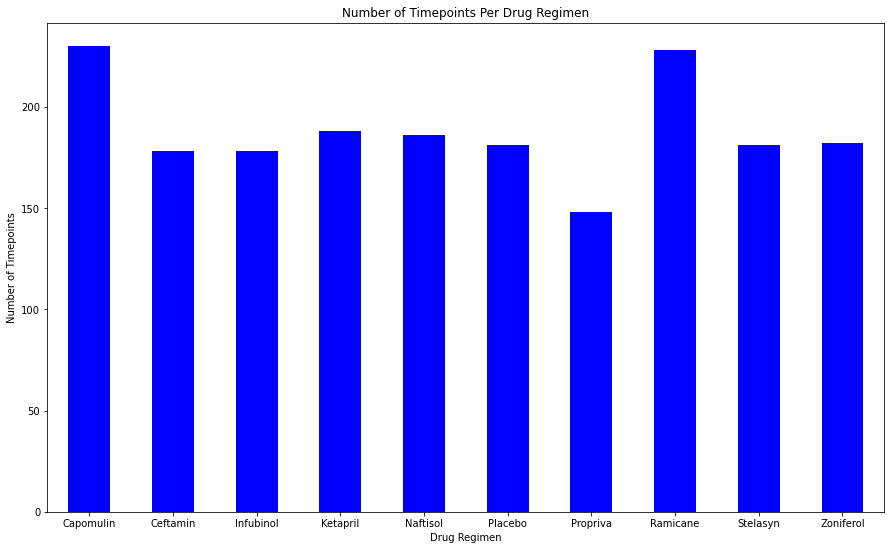

<Figure size 432x288 with 0 Axes>

In [22]:
# Use DataFrame.plot() in order to create a bar chart of the data
timepoints.plot(kind="bar", color = "blue", figsize=(15,9), title = "Number of Timepoints Per Drug Regimen", xlabel = "Drug Regimen", ylabel = "Number of Timepoints", rot = 0)

plt.show()
plt.tight_layout()

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(timepoints))
tick_locations = [value for value in x_axis]

# list of drug names for x-axis labels
drugRegimenLabels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol" ]

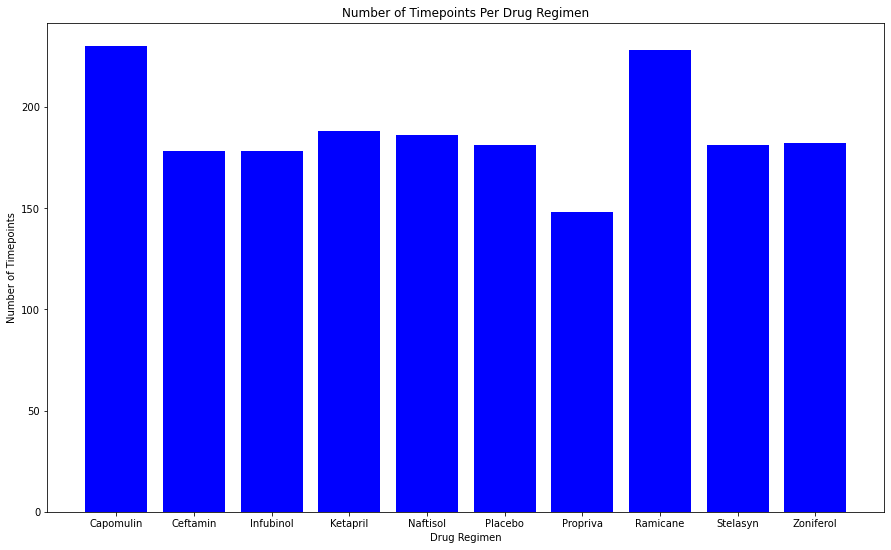

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,9)) # sets dimension for it to be viewable wide= 20, length = 4 
plt.bar(x_axis, timepoints, color='b', alpha=1, align="center")
plt.xticks(tick_locations, drugRegimenLabels , rotation="horizontal")

# Set a Title and labels
plt.title("Number of Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.show()
plt.tight_layout()

In [25]:
combinedDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


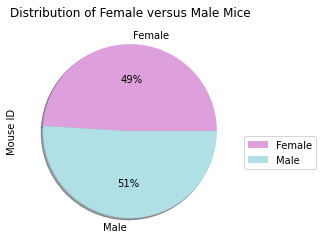

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = combinedDF.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID', autopct='%1.0f%%', colors = ["plum", "powderblue"], title = "Distribution of Female versus Male Mice", shadow = True, radius=1)
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexAlt = combinedDF.groupby(['Sex']).count()
sexAlt.head()


,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [28]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["plum", "powderblue"]

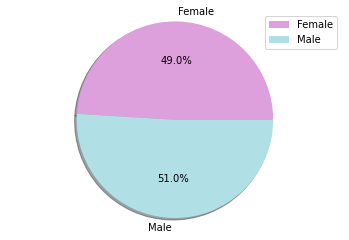

In [29]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# add a legend
plt.legend(loc='best')

## Quartiles, Outliers and Boxplots

In [30]:
combinedDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
maxTimepointDF = combinedDF.groupby(["Mouse ID"])["Timepoint"].max()
maxTimepointDF

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

maxTimepointCombinedDF = pd.merge(combinedDF, maxTimepointDF, on = ["Mouse ID", "Timepoint"])
maxTimepointCombinedDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
finalTumorVol = []
allTimepoints =[]

# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment.
for treatment in treatments:
    tumorVol = maxTimepointCombinedDF.loc[maxTimepointCombinedDF["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    timepoint = maxTimepointCombinedDF.loc[maxTimepointCombinedDF["Drug Regimen"] == treatment, "Timepoint"]
    # Append the resulting final tumor volumes for each drug to the empty list
    finalTumorVol.append(tumorVol)
    allTimepoints.append(timepoint)
    
    # Determine the quartiles, lowerq, upperq, iqer
    quartiles = tumorVol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumorVol.loc[(tumorVol > upper_bound)| (tumorVol < lower_bound)]
    
    print (f"{treatment}'s potential outlier: {outliers}")
    print(f"The lower quartile for {treatment} is: {lowerq}")
    print(f"The upper quartile for {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The median of {treatment} is: {quartiles[0.5]} ")
    print(f"For {treatment}, values below {lower_bound:.2f} could be outliers.")
    print(f"For {treatment}, values above {upper_bound:.2f} could be outliers.\n\n")

Capomulin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.1251644 
For Capomulin, values below 20.70 could be outliers.
For Capomulin, values above 51.83 could be outliers.


Ramicane's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
For Ramicane, values below 17.91 could be outliers.
For Ramicane, values above 54.31 could be outliers.


Infubinol's potential outlier: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11

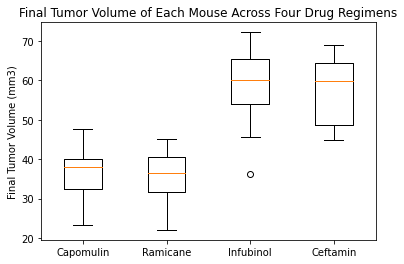

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(finalTumorVol, labels = treatments)
plt.show()

## Line and Scatter Plots

In [36]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

# find one mouse that was treated with Capomulin
combinedDFCapomulin = combinedDF.loc[combinedDF["Drug Regimen"] == "Capomulin"]
combinedDFCapomulin

# I will select Mouse ID s185 only

mouseIDCapomulin = combinedDFCapomulin.loc[combinedDFCapomulin["Mouse ID"] == "s185"]
mouseIDCapomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# y-axis = tumor volume for Capomulin
# x-axis = time point for Capomulin

timepointCapomulinList = mouseIDCapomulin["Timepoint"].values.tolist()
timepointCapomulinList

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [38]:
tumorVolumeCapomulinList = mouseIDCapomulin["Tumor Volume (mm3)"].values.tolist()
tumorVolumeCapomulinList

[45.0,
 43.87849569,
 37.61494768,
 38.17723195,
 36.86687576,
 33.94994037,
 32.95967078,
 28.32853059,
 25.47214326,
 23.34359787]

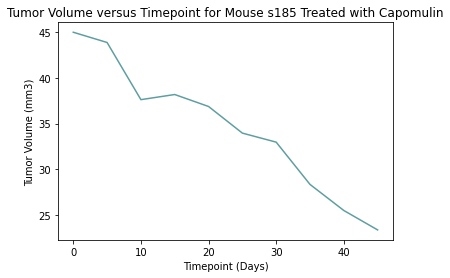

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# y-axis = tumor volume for Capomulin
# x-axis = time point for Capomulin

lineCapomulin = plt.plot(timepointCapomulinList, tumorVolumeCapomulinList, color="cadetblue")

plt.title("Tumor Volume versus Timepoint for Mouse s185 Treated with Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [40]:
combinedDFCapomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# find all mouses that were treated with Capomulin and group by Mouse ID and then according to their tumor volume and weight
combinedDFCapomulinAlt = combinedDFCapomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)", "Weight (g)"].mean()
combinedDFCapomulinAlt


C:\Users\amipa\AppData\Local\Temp/ipykernel_22424/1702044018.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  combinedDFCapomulinAlt = combinedDFCapomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)", "Weight (g)"].mean()


,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


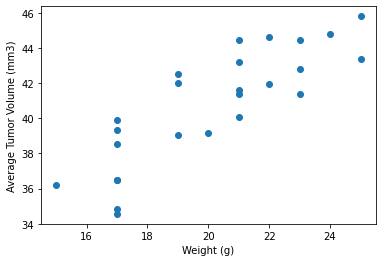

In [42]:
# y-axis = avg. tumor volume
# x-axis = avg. weight

x_values = combinedDFCapomulinAlt['Weight (g)']
y_values = combinedDFCapomulinAlt['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

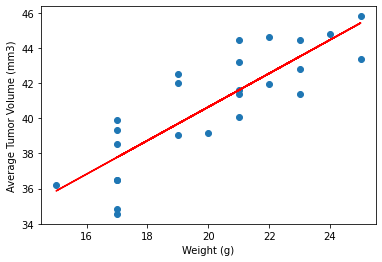

The correlation between mouse weight and the average tumor volume is 0.84


In [43]:
# Calculate the correlation coefficient and linear regression model
    # for mouse weight and average tumor volume for the Capomulin regimen

# use combinedDFCapomulinAlt dataframe for the correlation coefficient and linear regression model

x_values = combinedDFCapomulinAlt['Weight (g)']
y_values = combinedDFCapomulinAlt['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")